In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def plot_roc_curves(y, y_proba):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    all_y_train_i = np.empty(shape=(0, len(y)), dtype=int)
    all_y_predict_proba = np.empty(shape=(0, len(y)), dtype=int)

    # http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/
    for i in range(10):
        y_train_i = list(map(lambda x: 1 if x == i else 0, y))
        all_y_train_i = np.append(all_y_train_i, [copy.deepcopy(y_train_i)], axis=0)
        all_y_predict_proba = np.append(all_y_predict_proba, [y_proba[:, i]], axis=0)
        fpr[i], tpr[i], _ = roc_curve(y_train_i, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    colors = ['darkorange', 'forestgreen', 'royalblue', 'firebrick', 'gold', 'deepskyblue', 'darkviolet', 'peru', 'deeppink', 'yellowgreen']
    for lbl in range(10):
        plt.plot(fpr[lbl], tpr[lbl], color=colors[lbl], linewidth=2, label=f'Label {lbl} (area = {round(roc_auc[lbl], 2)})')
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves per label')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

training_dataSet = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10.csv')
testing_dataSet = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10.csv')

training_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_4000.csv')

training_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_9000.csv')

training_dataSet['label'] = training_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet['label'] = testing_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_4000['label'] = training_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_4000['label'] = testing_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_9000['label'] = training_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_9000['label'] = testing_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

In [3]:
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

y_train_4000 = training_dataSet_4000['label']
y_test_4000 = testing_dataSet_4000['label']
X_train_4000 = training_dataSet_4000.drop("label", axis=1)
X_test_4000 = testing_dataSet_4000.drop("label", axis=1)

y_train_9000 = training_dataSet_9000['label']
y_test_9000 = testing_dataSet_9000['label']
X_train_9000 = training_dataSet_9000.drop("label", axis=1)
X_test_9000 = testing_dataSet_9000.drop("label", axis=1)

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [1]:
import pandas as pd

training_dataSet = pd.read_csv('data/trainingData_top10.csv')
testing_dataSet = pd.read_csv('data/testingData_top10.csv')
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

training_dataSet_4000 = pd.read_csv('data/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('data/testingData_top10_4000.csv')
y_train_4000 = training_dataSet_4000['label']
y_test_4000 = testing_dataSet_4000['label']
X_train_4000 = training_dataSet_4000.drop("label", axis=1)
X_test_4000 = testing_dataSet_4000.drop("label", axis=1)

training_dataSet_9000 = pd.read_csv('data/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('data/testingData_top10_9000.csv')
y_train_9000 = training_dataSet_9000['label']
y_test_9000 = testing_dataSet_9000['label']
X_train_9000 = training_dataSet_9000.drop("label", axis=1)
X_test_9000 = testing_dataSet_9000.drop("label", axis=1)

[[ 988  305   19   18    9    9   24    7   28    3]
 [ 264 1365   56   34   21   34   27    7   45    7]
 [  31   61  297    7    2    3    4    3   10    2]
 [  13   29    2 1218   21    8    9    0   20    0]
 [  12   26    6   15 1934   70    0    7   28    2]
 [  10   24    3    5   52 2044    1    3   13    5]
 [  24   44    5   10    1    0  691    0    1    4]
 [   9    9    4    0    7    1    0  193    9    8]
 [  30   32    8   15   15   18    2   11 1935    4]
 [   7    2    0    1    6    5    1    8    7  263]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1410
           1       0.72      0.73      0.73      1860
           2       0.74      0.71      0.72       420
           3       0.92      0.92      0.92      1320
           4       0.94      0.92      0.93      2100
           5       0.93      0.95      0.94      2160
           6       0.91      0.89      0.90       780
           7       0.81      0.80   

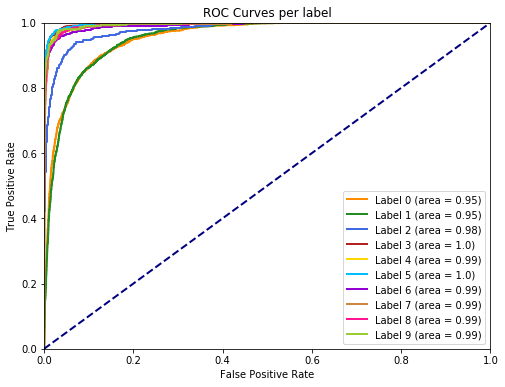

In [5]:
# MULTILAYER PERCEPTRON: 10-FOLD CROSS VALIDATION

clf = MLPClassifier()
y_pred_cross = cross_val_predict(clf, X_train, y_train, cv=10)

print(confusion_matrix(y_train, y_pred_cross))
print(classification_report(y_train, y_pred_cross))

y_pred_cross_proba = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba')

plot_roc_curves(y_train, y_pred_cross_proba)

[[286 129   5   6   2   1   6   0  12   3]
 [ 97 489  13  13   7   0   4   1   5   1]
 [ 18  50  72   2   1   0   4   2   1   0]
 [ 12  18   1 360   8   3   0   1  16   1]
 [  9  16   0  12 603   8   0   9  31   2]
 [  0  15   0   1  25 672   0   0   3   4]
 [ 10  41   2   0   1   0 213   0   1   2]
 [  0   0   2   0  12   0   0  44   2   0]
 [ 13  30  13  11  34   8   0   1 573   7]
 [  4  11   0   0   0   1   0  27   8  39]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       450
           1       0.61      0.78      0.68       630
           2       0.67      0.48      0.56       150
           3       0.89      0.86      0.87       420
           4       0.87      0.87      0.87       690
           5       0.97      0.93      0.95       720
           6       0.94      0.79      0.86       270
           7       0.52      0.73      0.61        60
           8       0.88      0.83      0.85       690
           9       0.66     

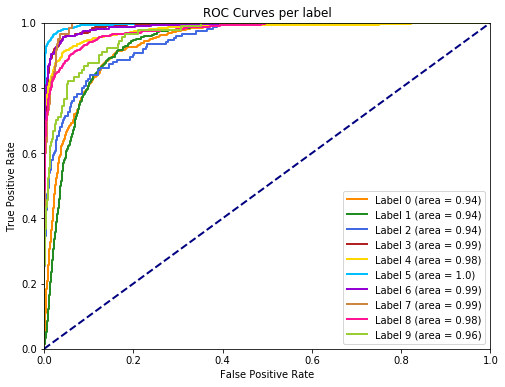

In [6]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS

clf = MLPClassifier()
y_pred_MLP = clf.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, y_pred_MLP))
print(classification_report(y_test, y_pred_MLP))

y_pred_MLP_proba = clf.predict_proba(X_test)

plot_roc_curves(y_test, y_pred_MLP_proba)

[[ 543  241   28   17    8    5   23    3   18   10]
 [ 178  876   39   45   14   11   40    3   24    5]
 [  15   61  191    4    4    3    2    1    7    2]
 [  12   15    3  761   27    3    1    1   10    3]
 [  11   26    3   15 1202   41    0   16   21    4]
 [   1   15    2    4   54 1306    0    1    6    1]
 [  22   32    5    6    2    0  432    0    1    5]
 [   4    3    5    2   21    5    0   87    0    8]
 [  20   26   23   27   39   22    1    5 1179    6]
 [   3   27    7    2    1    2    0   12    5  137]]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       896
           1       0.66      0.71      0.69      1235
           2       0.62      0.66      0.64       290
           3       0.86      0.91      0.89       836
           4       0.88      0.90      0.89      1339
           5       0.93      0.94      0.94      1390
           6       0.87      0.86      0.86       505
           7       0.67      0.64   

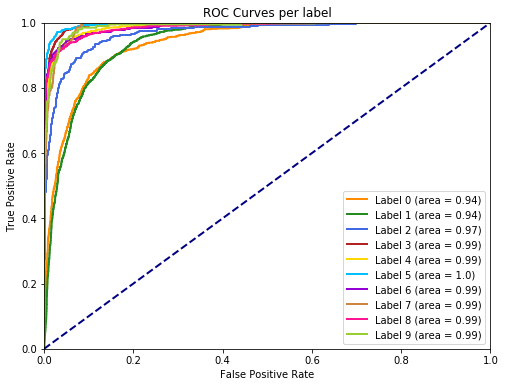

In [7]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS (4000 TRAINING -> TESTING)

clf_4000 = MLPClassifier()
y_pred_MLP = clf_4000.fit(X_train_4000, y_train_4000).predict(X_test_4000)

print(confusion_matrix(y_test_4000, y_pred_MLP))
print(classification_report(y_test_4000, y_pred_MLP))

y_pred_MLP_proba = clf_4000.predict_proba(X_test_4000)

plot_roc_curves(y_test_4000, y_pred_MLP_proba)

[[ 877  365   44   23   12   10   46    8   46    8]
 [ 324 1279   83   38   36   23   71   13   60    5]
 [  41  113  243    7   13    4   11    5   17    1]
 [  21   28    3 1180   43    9    8    2   51    4]
 [  18   55    4   41 1856   99    2   19   66    3]
 [  15   25    1   26  112 2070    1    5   23    1]
 [  31   80    8    8    0    1  683    1    4    3]
 [  14   10    2    5   27    0    2  139   15   21]
 [  31   49   56   39   43   32    9   14 1891    8]
 [  11   18    6    8    7    8    3   38   14  214]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1439
           1       0.63      0.66      0.65      1932
           2       0.54      0.53      0.54       455
           3       0.86      0.87      0.87      1349
           4       0.86      0.86      0.86      2163
           5       0.92      0.91      0.91      2279
           6       0.82      0.83      0.83       819
           7       0.57      0.59   

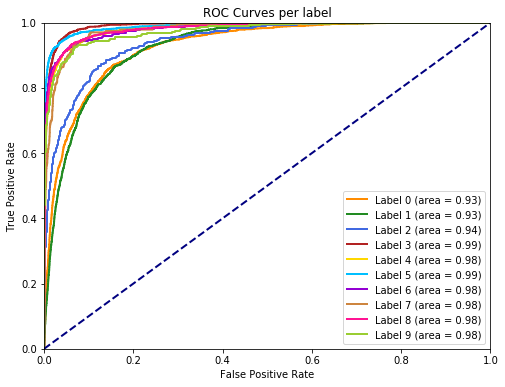

In [8]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS (9000 TRAINING -> TESTING)

clf_9000 = MLPClassifier()
y_pred_MLP = clf_9000.fit(X_train_9000, y_train_9000).predict(X_test_9000)

print(confusion_matrix(y_test_9000, y_pred_MLP))
print(classification_report(y_test_9000, y_pred_MLP))

y_pred_MLP_proba = clf_9000.predict_proba(X_test_9000)

plot_roc_curves(y_test_9000, y_pred_MLP_proba)

In [2]:
possible_parameters = {
    'hidden_layer_sizes': [(50, 20), (100,)],
    'alpha': [0.0001, 0.00005],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0005],
    'beta_1': [0.9, 0.99],
    'beta_2': [0.999, 0.5],
    'epsilon': [1e-8, 5e-9, 2e-9]
}

In [ ]:
import warnings; warnings.simplefilter('ignore')

clf = MLPClassifier(max_iter=1000)
clf = GridSearchCV(clf, possible_parameters, n_jobs=4, verbose=10)
clf.fit(X_train, y_train)

cv = clf.cv_results_
tab = pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes']
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate']
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab.sort_values(['rank_test_score']).to_csv('results_all.csv', encoding='utf-8', sep=',', index=False)
tab.sort_values(['rank_test_score']).head(10)

In [ ]:
import warnings; warnings.simplefilter('ignore')

clf_4000 = MLPClassifier(max_iter=1000)
clf_4000 = GridSearchCV(clf_4000, possible_parameters, n_jobs=4, verbose=10)
clf_4000.fit(X_train_4000, y_train_4000)

cv = clf_4000.cv_results_
tab_4000 = pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes']
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate']
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab_4000.sort_values(['rank_test_score']).to_csv('results_4000.csv', encoding='utf-8', sep=',', index=False)
tab_4000.sort_values(['rank_test_score']).head(10)

In [ ]:
import warnings; warnings.simplefilter('ignore')

clf_9000 = MLPClassifier(max_iter=1000)
clf_9000 = GridSearchCV(clf_9000, possible_parameters, n_jobs=4, verbose=10)
clf_9000.fit(X_train_9000, y_train_9000)

cv = clf_9000.cv_results_
tab _9000= pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes']
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate']
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab_9000.sort_values(['rank_test_score']).to_csv('results_9000.csv', encoding='utf-8', sep=',', index=False)
tab_9000.sort_values(['rank_test_score']).head(10)